# Image filters in racoon
### Import libraries

In [1]:
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt

### Seeing image in _scipy_

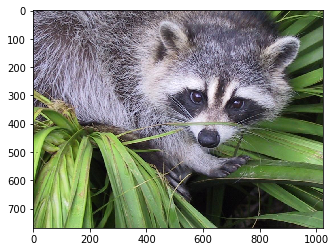

In [2]:
def readImage():
    f = misc.face()
    plt.imshow(f)

readImage()

### Get image

In [3]:
original = misc.face()

### Get image in gray scale

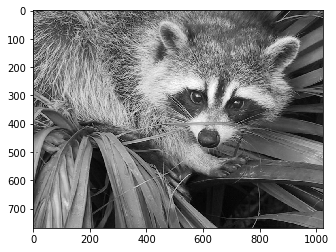

In [4]:
# Get gray scale
def grayScale(original):
    grayScale = np.array(original)

    for i in range(original.shape[0]):
        for j in range(original.shape[1]):
            pixel = np.array(original[i, j])
            pixel = [sum(pixel) / 3] * len(pixel)
            grayScale[i, j] = pixel
            
    return grayScale

grayScale = grayScale(original)

plt.imshow(grayScale)

### Get image with inverted colors

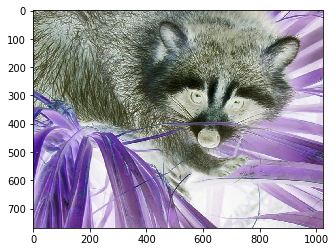

In [5]:
# Get inverted colors
def invertedColors(original):
    inverted = np.array(original)

    for i in range(original.shape[0]):
        for j in range(original.shape[1]):
            pixel = np.array(original[i, j])

            for k in range(len(pixel)):
                pixel[k] = 255 - pixel[k]
            inverted[i, j] = pixel
            
    return inverted

inverted = invertedColors(original)

plt.imshow(inverted)

### Get image with blur effect

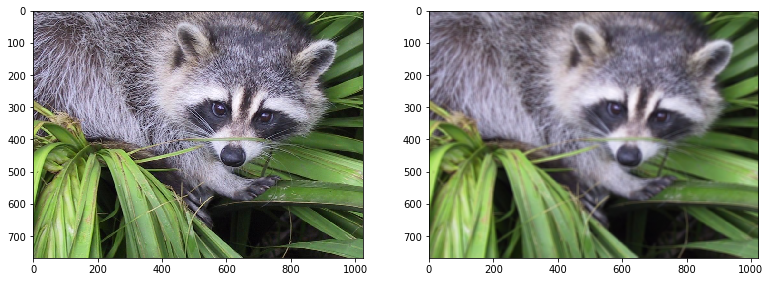

In [6]:
# Get blurred image
def blurredImage(original):
    blurred = np.array(original)

    for i in range(original.shape[0]):
        for j in range(original.shape[1]):
            colorR, colorG, colorB = 0, 0, 0
            counter = 0
            
            for k in range(i - 4, i + 5):
                for l in range(j - 4, j + 5):
                    if(k >= 0 and k < blurred.shape[0]):
                        if(l >= 0 and l < blurred.shape[1]):
                            counter += 1
                            colorR += original[k, l, 0]
                            colorG += original[k, l, 1]
                            colorB += original[k, l, 2]

            pixel = np.array([colorR / counter, colorG / counter, colorB / counter])
            blurred[i, j] = pixel
            
    return blurred

#grayScale = grayScale(original)
blurred = blurredImage(original)

fig, axarr = plt.subplots(1, 2, figsize=(13, 13))

axarr[0].imshow(original)
axarr[1].imshow(blurred)

### Set gray scaled image and create black-and-white binary image

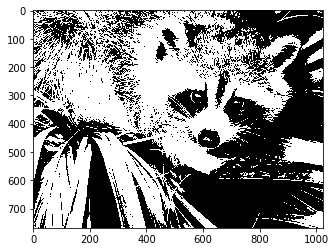

In [7]:
# Get binary image
def binaryImage(original):
    binary = np.array(original)
    allDots = binary.shape[0] * binary.shape[1]
    threshold = 0
    
    for i in range(original.shape[0]):
        for j in range(original.shape[1]):
            threshold += original[i, j, 0]
            
    threshold = threshold / allDots
    
    for i in range(original.shape[0]):
        for j in range(original.shape[1]):
            pixel = np.array(original[i, j])
            
            if(pixel[0] < threshold):
                for k in range(len(pixel)):
                    pixel[k] = 0
            else:
                for k in range(len(pixel)):
                    pixel[k] = 255

            binary[i, j] = pixel
    
    return binary

binary = binaryImage(grayScale)

plt.imshow(binary)